# Préparation du dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from glob import glob

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# os.environ["TF_KERAS"]='1'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
data = pd.read_csv('dataImage.csv')
data.columns = ['uniq_id','image_path', 'label_name', 'label']
data

,uniq_id,image_path,label_name,label
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,0
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,1
2,64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,1
3,d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,0
4,6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,0
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care,1
1046,fd6cbcc22efb6b761bd564c28928483c,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care,1
1047,5912e037d12774bb73a2048f35a00009,5912e037d12774bb73a2048f35a00009.jpg,Baby Care,1
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care,1


In [4]:
from sklearn.model_selection import train_test_split

# df est votre DataFrame original

# Diviser en ensembles d'entraînement et temporaire
train_df, temp_df = train_test_split(data, test_size=0.3, stratify=data['label'], random_state=42)

# Diviser l'ensemble temporaire en ensembles de validation et de test
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

print('train : ', train_df.shape)
print('validation : ', val_df.shape)
print('test : ', test_df.shape)

train :  (735, 4)
validation :  (157, 4)
test :  (158, 4)


In [5]:
data.groupby("label").count()

,uniq_id,image_path,label_name
label,,,
0,150,150,150
1,150,150,150
2,150,150,150
3,150,150,150
4,150,150,150
5,150,150,150
6,150,150,150


In [6]:
display(train_df.groupby("label").count()) , display(val_df.groupby("label").count()) , display(test_df.groupby("label").count())

,uniq_id,image_path,label_name
label,,,
0,105,105,105
1,105,105,105
2,105,105,105
3,105,105,105
4,105,105,105
5,105,105,105
6,105,105,105


,uniq_id,image_path,label_name
label,,,
0,23,23,23
1,23,23,23
2,22,22,22
3,22,22,22
4,22,22,22
5,23,23,23
6,22,22,22


,uniq_id,image_path,label_name
label,,,
0,22,22,22
1,22,22,22
2,23,23,23
3,23,23,23
4,23,23,23
5,22,22,22
6,23,23,23


(None, None, None)

In [7]:
train_df['label_name'].unique()

array(['Home Decor & Festive Needs ', 'Beauty and Personal Care ',
       'Baby Care ', 'Watches ', 'Computers ', 'Kitchen & Dining ',
       'Home Furnishing '], dtype=object)

In [8]:
from sklearn import preprocessing


list_labels = ['Home Furnishing ', 'Baby Care ', 'Watches ',
               'Home Decor & Festive Needs ', 'Kitchen & Dining ',
               'Beauty and Personal Care ', 'Computers ']
label_no_name = "no_name "



Ce code est utilisé pour créer une structure de dossiers sur le disque pour stocker des images appartenant à différentes catégories, et cela pour trois ensembles différents : entraînement (training), validation et test.

Voici une explication étape par étape :

1. **Définition des chemins**:
    - `original_dataset_dir` est le chemin vers le dossier où se trouve le jeu de données original.
    - `base_dir` est le chemin où vous prévoyez de stocker votre jeu de données réorganisé en sous-dossiers pour l'entraînement, la validation et les tests.

2. **Création des répertoires principaux**:
    - Un nouveau répertoire est créé à `base_dir`.
    - Trois sous-répertoires sont ensuite créés dans `base_dir` : `train` pour les données d'entraînement, `validation` pour les données de validation et `test` pour les données de test.

3. **Création des sous-répertoires pour chaque catégorie**:
    - Pour chaque ensemble (entraînement, validation, test), sept sous-répertoires sont créés pour les catégories d'images suivantes : 
        - Home Decor & Festive Needs
        - Beauty and Personal Care
        - Baby Care
        - Watches
        - Computers
        - Kitchen & Dining
        - Home Furnishing

À la fin de l'exécution de ce code, vous aurez une structure de répertoires où vous pourrez placer vos images pour chaque catégorie et chaque ensemble (entraînement, validation, test). Cela permettra d'organiser vos données pour un traitement ultérieur, comme l'entraînement d'un modèle de machine learning.

In [9]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'C://Users//pouri//OneDrive//Bureau//P6//Images//'

# The directory where we will
# store our smaller dataset
base_dir = 'C://Users//pouri//OneDrive//Bureau//P6//7categ//'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#################### train ##############################

# Directory with our training Home Decor & Festive Needs pictures
train_Home_Decor_and_Festive_Needs_dir = os.path.join(train_dir, 'Home Decor & Festive Needs')
os.mkdir(train_Home_Decor_and_Festive_Needs_dir)

# Directory with our training Beauty and Personal Care pictures
train_Beauty_and_Personal_Care_dir = os.path.join(train_dir, 'Beauty and Personal Care')
os.mkdir(train_Beauty_and_Personal_Care_dir)

# Directory with our training Baby Care pictures
train_Baby_Care_dir = os.path.join(train_dir, 'Baby Care')
os.mkdir(train_Baby_Care_dir)

# Directory with our training Watches pictures
train_Watches_dir = os.path.join(train_dir, 'Watches')
os.mkdir(train_Watches_dir)

# Directory with our training Computers pictures
train_Computers_dir = os.path.join(train_dir, 'Computers')
os.mkdir(train_Computers_dir)

# Directory with our training Kitchen & Dining pictures
train_Kitchen_and_Dining_dir = os.path.join(train_dir, 'Kitchen & Dining')
os.mkdir(train_Kitchen_and_Dining_dir)

# Directory with our training Home Furnishing pictures
train_Home_Furnishing_dir = os.path.join(train_dir, 'Home Furnishing')
os.mkdir(train_Home_Furnishing_dir)



#################### validation ##############################

# Directory with our validation Home Decor & Festive Needs pictures
val_Home_Decor_and_Festive_Needs_dir = os.path.join(validation_dir, 'Home Decor & Festive Needs')
os.mkdir(val_Home_Decor_and_Festive_Needs_dir)

# Directory with our validation Beauty and Personal Care pictures
val_Beauty_and_Personal_Care_dir = os.path.join(validation_dir, 'Beauty and Personal Care')
os.mkdir(val_Beauty_and_Personal_Care_dir)

# Directory with our validation Baby Care pictures
val_Baby_Care_dir = os.path.join(validation_dir, 'Baby Care')
os.mkdir(val_Baby_Care_dir)

# Directory with our validation Watches pictures
val_Watches_dir = os.path.join(validation_dir, 'Watches')
os.mkdir(val_Watches_dir)

# Directory with our validation Computers pictures
val_Computers_dir = os.path.join(validation_dir, 'Computers')
os.mkdir(val_Computers_dir)

# Directory with our validation Kitchen & Dining pictures
val_Kitchen_and_Dining_dir = os.path.join(validation_dir, 'Kitchen & Dining')
os.mkdir(val_Kitchen_and_Dining_dir)

# Directory with our validation Home Furnishing pictures
val_Home_Furnishing_dir = os.path.join(validation_dir, 'Home Furnishing')
os.mkdir(val_Home_Furnishing_dir)

#################### test ##############################

# Directory with our test Home Decor & Festive Needs pictures
test_Home_Decor_and_Festive_Needs_dir = os.path.join(test_dir, 'Home Decor & Festive Needs')
os.mkdir(test_Home_Decor_and_Festive_Needs_dir)

# Directory with our test Beauty and Personal Care pictures
test_Beauty_and_Personal_Care_dir = os.path.join(test_dir, 'Beauty and Personal Care')
os.mkdir(test_Beauty_and_Personal_Care_dir)

# Directory with our test Baby Care pictures
test_Baby_Care_dir = os.path.join(test_dir, 'Baby Care')
os.mkdir(test_Baby_Care_dir)

# Directory with our test Watches pictures
test_Watches_dir = os.path.join(test_dir, 'Watches')
os.mkdir(test_Watches_dir)

# Directory with our test Computers pictures
test_Computers_dir = os.path.join(test_dir, 'Computers')
os.mkdir(test_Computers_dir)

# Directory with our test Kitchen & Dining pictures
test_Kitchen_and_Dining_dir = os.path.join(test_dir, 'Kitchen & Dining')
os.mkdir(test_Kitchen_and_Dining_dir)

# Directory with our test Home Furnishing pictures
test_Home_Furnishing_dir = os.path.join(test_dir, 'Home Furnishing')
os.mkdir(test_Home_Furnishing_dir)


In [10]:
# df train
df_train_Home_Decor_and_Festive_Needs = train_df[train_df['label_name'] == 'Home Decor & Festive Needs ']
df_train_Beauty_and_Personal_Care = train_df[train_df['label_name'] == 'Beauty and Personal Care ']
df_train_Baby_Care = train_df[train_df['label_name'] == 'Baby Care ']
df_train_Watches = train_df[train_df['label_name'] == 'Watches ']
df_train_Computers = train_df[train_df['label_name'] == 'Computers ']
df_train_Kitchen_and_Dining = train_df[train_df['label_name'] == 'Kitchen & Dining ']
df_train_Home_Furnishing = train_df[train_df['label_name'] == 'Home Furnishing ']

#df validation
df_val_Home_Decor_and_Festive_Needs = val_df[val_df['label_name'] == 'Home Decor & Festive Needs ']
df_val_Beauty_and_Personal_Care = val_df[val_df['label_name'] == 'Beauty and Personal Care ']
df_val_Baby_Care = val_df[val_df['label_name'] == 'Baby Care ']
df_val_Watches = val_df[val_df['label_name'] == 'Watches ']
df_val_Computers = val_df[val_df['label_name'] == 'Computers ']
df_val_Kitchen_and_Dining = val_df[val_df['label_name'] == 'Kitchen & Dining ']
df_val_Home_Furnishing = val_df[val_df['label_name'] == 'Home Furnishing ']

#df test
df_test_Home_Decor_and_Festive_Needs = test_df[test_df['label_name'] == 'Home Decor & Festive Needs ']
df_test_Beauty_and_Personal_Care = test_df[test_df['label_name'] == 'Beauty and Personal Care ']
df_test_Baby_Care = test_df[test_df['label_name'] == 'Baby Care ']
df_test_Watches = test_df[test_df['label_name'] == 'Watches ']
df_test_Computers = test_df[test_df['label_name'] == 'Computers ']
df_test_Kitchen_and_Dining = test_df[test_df['label_name'] == 'Kitchen & Dining ']
df_test_Home_Furnishing = test_df[test_df['label_name'] == 'Home Furnishing ']

In [11]:
#train names list
train_Home_Decor_and_Festive_Needs_list = list(df_train_Home_Decor_and_Festive_Needs['image_path'])
train_Beauty_and_Personal_Care_list = list(df_train_Beauty_and_Personal_Care['image_path'])
train_df_train_Baby_Care_list = list(df_train_Baby_Care['image_path'])
train_Watches_list = list(df_train_Watches['image_path'])
train_Computers_list = list(df_train_Computers['image_path'])
train_Kitchen_and_Dining_list = list(df_train_Kitchen_and_Dining['image_path'])
train_Home_Furnishing_list = list(df_train_Home_Furnishing['image_path'])

#validation names list
val_Home_Decor_and_Festive_Needs_list = list(df_val_Home_Decor_and_Festive_Needs['image_path'])
val_Beauty_and_Personal_Care_list = list(df_val_Beauty_and_Personal_Care['image_path'])
val_df_train_Baby_Care_list = list(df_val_Baby_Care['image_path'])
val_Watches_list = list(df_val_Watches['image_path'])
val_Computers_list = list(df_val_Computers['image_path'])
val_Kitchen_and_Dining_list = list(df_val_Kitchen_and_Dining['image_path'])
val_Home_Furnishing_list = list(df_val_Home_Furnishing['image_path'])


#test names list
test_Home_Decor_and_Festive_Needs_list = list(df_test_Home_Decor_and_Festive_Needs['image_path'])
test_Beauty_and_Personal_Care_list = list(df_test_Beauty_and_Personal_Care['image_path'])
test_df_train_Baby_Care_list = list(df_test_Baby_Care['image_path'])
test_Watches_list = list(df_test_Watches['image_path'])
test_Computers_list = list(df_test_Computers['image_path'])
test_Kitchen_and_Dining_list = list(df_test_Kitchen_and_Dining['image_path'])
test_Home_Furnishing_list = list(df_test_Home_Furnishing['image_path'])

In [12]:
print(len(train_Home_Decor_and_Festive_Needs_list))
print(len(val_Home_Decor_and_Festive_Needs_list))
print(len(test_Home_Decor_and_Festive_Needs_list))

Le code fourni est principalement utilisé pour copier des images depuis un répertoire original vers de nouveaux répertoires d'entraînement, de validation et de test en fonction de leurs catégories. Voici un résumé de ce qu'il fait :

1. **Importation du module**:
   - Le module `shutil` est importé. Il fournit une interface de haut niveau pour copier des fichiers.

2. **Copie d'images pour l'entraînement**:
   - Pour chaque catégorie (comme "Home Decor & Festive Needs", "Beauty and Personal Care", etc.), une boucle parcourt une liste d'images et copie chaque image du répertoire original vers le sous-répertoire d'entraînement correspondant à cette catégorie.

3. **Copie d'images pour la validation**:
   - De manière similaire à l'entraînement, pour chaque catégorie, une boucle parcourt une liste d'images et les copie du répertoire original vers le sous-répertoire de validation correspondant à cette catégorie.

4. **Copie d'images pour le test**:
   - Encore une fois, de la même manière, pour chaque catégorie, une boucle parcourt une liste d'images et les copie du répertoire original vers le sous-répertoire de test correspondant à cette catégorie.

En résumé, ce code structure le dataset en le divisant en trois ensembles distincts (entraînement, validation, test) et en classant chaque image dans la catégorie appropriée pour chacun de ces ensembles. Cela est souvent fait dans le cadre de la préparation des données pour l'entraînement, la validation et le test d'un modèle d'apprentissage automatique ou de deep learning.

In [13]:
import shutil

#################### train image copy ##############################
for fname in train_Home_Decor_and_Festive_Needs_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Home_Decor_and_Festive_Needs_dir, fname)
    shutil.copyfile(src, dst)
    
    
for fname in train_Beauty_and_Personal_Care_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Beauty_and_Personal_Care_dir, fname)
    shutil.copyfile(src, dst)

    
for fname in train_df_train_Baby_Care_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Baby_Care_dir, fname)
    shutil.copyfile(src, dst)    
    
for fname in train_Watches_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Watches_dir, fname)
    shutil.copyfile(src, dst)    
    
    
for fname in train_Computers_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Computers_dir, fname)
    shutil.copyfile(src, dst)    
    
    
for fname in train_Kitchen_and_Dining_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Kitchen_and_Dining_dir, fname)
    shutil.copyfile(src, dst)
    
for fname in train_Home_Furnishing_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Home_Furnishing_dir, fname)
    shutil.copyfile(src, dst)    
    
    
#################### validation image copy ##############################

for fname in val_Home_Decor_and_Festive_Needs_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_Home_Decor_and_Festive_Needs_dir, fname)
    shutil.copyfile(src, dst)
    
    
for fname in val_Beauty_and_Personal_Care_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_Beauty_and_Personal_Care_dir, fname)
    shutil.copyfile(src, dst)

    
for fname in val_df_train_Baby_Care_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_Baby_Care_dir, fname)
    shutil.copyfile(src, dst)    
    
for fname in val_Watches_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_Watches_dir, fname)
    shutil.copyfile(src, dst)    
    
    
for fname in val_Computers_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_Computers_dir, fname)
    shutil.copyfile(src, dst)    
    
    
for fname in val_Kitchen_and_Dining_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_Kitchen_and_Dining_dir, fname)
    shutil.copyfile(src, dst)
    
for fname in val_Home_Furnishing_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_Home_Furnishing_dir, fname)
    shutil.copyfile(src, dst)        
    
#################### test image copy ##############################

for fname in test_Home_Decor_and_Festive_Needs_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Home_Decor_and_Festive_Needs_dir, fname)
    shutil.copyfile(src, dst)
    
    
for fname in test_Beauty_and_Personal_Care_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Beauty_and_Personal_Care_dir, fname)
    shutil.copyfile(src, dst)

    
for fname in test_df_train_Baby_Care_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Baby_Care_dir, fname)
    shutil.copyfile(src, dst)    
    
for fname in test_Watches_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Watches_dir, fname)
    shutil.copyfile(src, dst)    
    
    
for fname in test_Computers_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Computers_dir, fname)
    shutil.copyfile(src, dst)    
    
    
for fname in test_Kitchen_and_Dining_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Kitchen_and_Dining_dir, fname)
    shutil.copyfile(src, dst)
    
for fname in test_Home_Furnishing_list:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Home_Furnishing_dir, fname)
    shutil.copyfile(src, dst)  

In [14]:
path = "C://Users//pouri//OneDrive//Bureau//P6//Images//"
# path_test = "./Images_test/"

Home Furnishing 


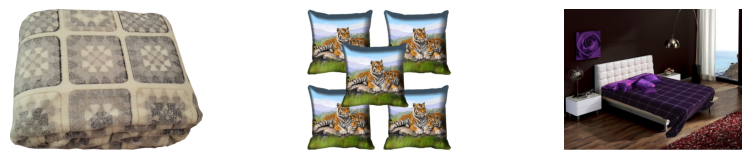

Baby Care 


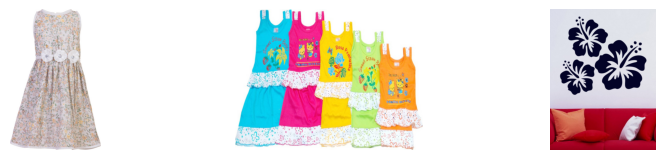

Watches 


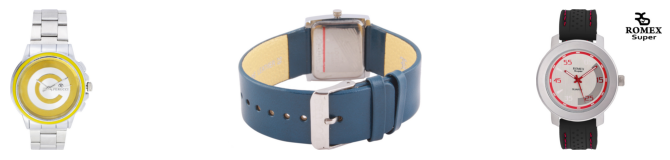

Home Decor & Festive Needs 


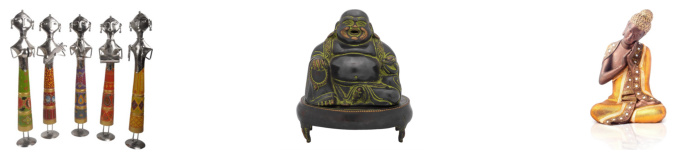

Kitchen & Dining 


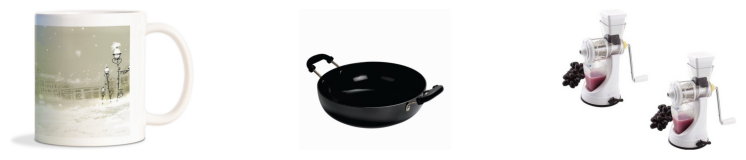

Beauty and Personal Care 


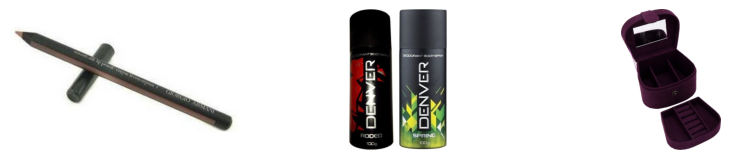

Computers 


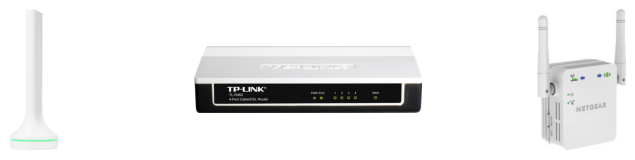

In [15]:
from matplotlib.image import imread
list_labels = data["label_name"].unique()


for name in list_labels:
    plt.figure(figsize=(10, 15))
    print("=" * 50)
    print('\033[1m' + name)
    print("=" * 50)
    for i in range(3):
        plt.subplot(7, 3, i + 1)
        for j in data[data["label_name"] == name].image_path.sample():  # Remplacer "image_filename" par le nom de la colonne réel
            filename = path + j
            image = imread(filename)
            plt.axis('off')
            plt.imshow(image)
         
    plt.show()


# Etape 1 : étude de faisabilité

## Création du modèle pré-entraîné

In [16]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Création des features des images

In [17]:
# from PIL import Image
# Image.MAX_IMAGE_PIXELS = 100000000

# images_features = []
# i=0 
# for image_file in path + data["image_path"] :
#     if i%100 == 0 : print(i)
#     i +=1
#     image = load_img(image_file, target_size=(224, 224))
#     image = img_to_array(image) 
#     image = np.expand_dims(image, axis=0)
#     image = preprocess_input(image)
#     images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model

# images_features = np.asarray(images_features)
# images_features.shape

In [18]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 100000000

images_features = []
i=0 
for image_file in path + data["image_path"] :
    if i%100 == 0 : print(i) #Toutes les 100 images traitées, il affiche la valeur de i pour donner un aperçu de la progression.
    i +=1
    try:
        image = load_img(image_file, target_size=(224, 224))
        image = img_to_array(image) 
        image = np.expand_dims(image, axis=0)
        image = preprocess_input(image)
        images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model
    except Exception as e:
        print(f"Erreur lors du traitement de l'image {image_file}: {e}")

images_features = np.asarray(images_features)
print(images_features.shape)


0
100
200
300
400
500
600
700
800
900
1000
(1050, 4096)


## Réduction dimension et analyse

### Réduction de dimension PCA

In [19]:
from sklearn import manifold, decomposition

print(images_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(images_features)
print(feat_pca.shape)

(1050, 4096)
(1050, 803)


### Réduction de dimension T-SNE et affichage des images selon vraies classes

In [20]:
from sklearn import manifold, decomposition
import time

temps1 = time.time()

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time()-temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

temps de T-SNE :             6.82 secondes


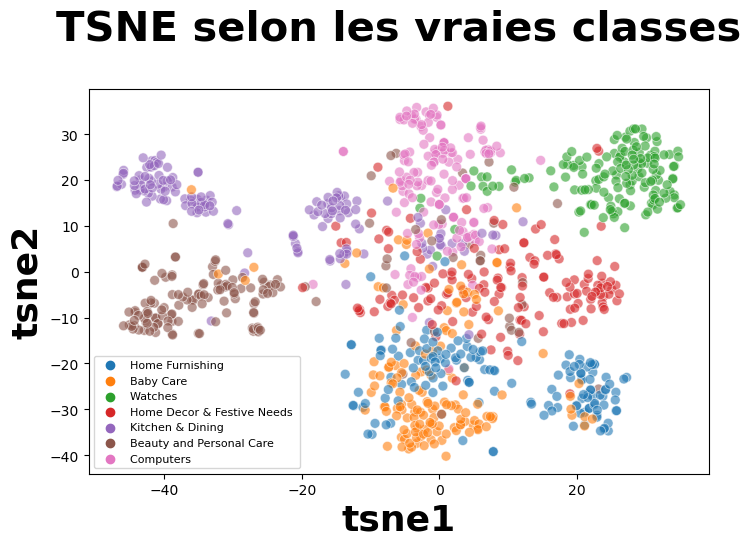

In [21]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label_name"]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 8}) 

plt.show()


* L'analyse graphique montre visuellement qu'il est réalisable de séparer automatiquement les images selon leurs vraies classes
* Ceci suffit à démontrer la faisabilité de réaliser ultérieurement une classification supervisée pour déterminer automatiquement les classes des images
* Cette étape 1 est très rapide à mettre en oeuvre. Une conclusion négative sur la faisabilité aurait éviter de réaliser des traitements beaucoup plus lourd de classification supervisée
* Cette démarche en 2 étapes (1. Faisabilité, 2. Classification supervisée si étape 1 OK) s'inscrit dans une démarche agile de tout projet Data

### Création de clusters à partir du T-SNE et affichage des images selon clusters
* Attention : ici, il ne s'agit pas de faire une classification non supervisée, mais simplement, par une mesure de l'ARI, de conforter l'analyse graphique précédente qui démontre la faisabilité de réaliser ultérieurement une classification supervisée. Cette mesure de l'ARI nécessite de créer des clusters théoriques via KMeans
* Il s'agit donc de réaliser une mesure de ce que nous voyons graphiquement, donc à partir des données en sortie du t-sne
* Pour réaliser une classification non supervisée, il aurait fallu repartir des données avant t-sne
* Dans la démarche en 2 étapes, il n'est pas utile de réaliser une classification non supervisée, une classification supervisée est bien plus performante. Même le calcul de l'ARI n'est pas indispensable, nous pourrions passer directement du graphique t-sne précédent à l'étape 2 de classification supervisée
* Il n'est donc pas utile de passer du temps à optimiser l'ARI, un ordre de grandeur suffit pour conforter le 1er graphique t-sne. D'ailleurs la meilleure solution de feature engineering ne génère pas toujours le meilleur ARI. L'analyse graphique t-sne est bien plus riche d'enseignement


In [22]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, n_init=100)
cls.fit(X_tsne)

C:\Users\pouri\anaconda3\envs\mon_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=7, n_init=100)

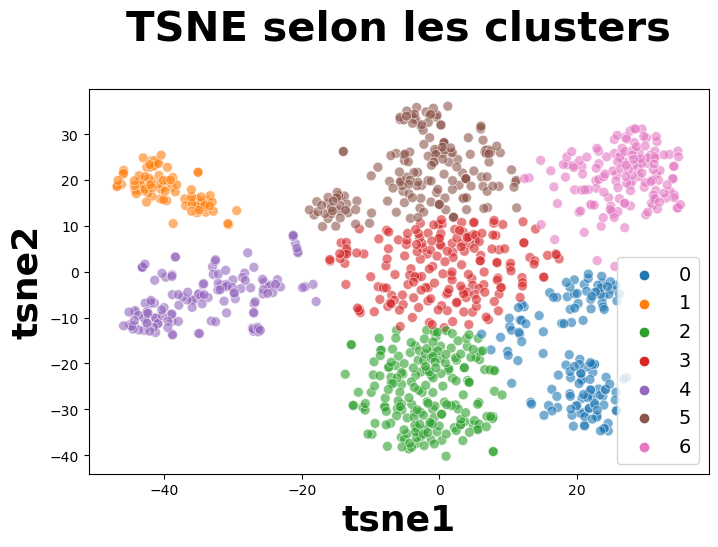

ARI :  0.452639308412587


In [23]:
df_tsne["cluster"] = cls.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [24]:
# # Analyse d'image "Home Decor & Festive Needs" affectées au cluster 3 "computer"

# list_shine_0 = [i for i in range(len(data["image_path"])) \
#                 if (data.iloc[i]['label_name']=='Home Decor & Festive Needs ') and (df_tsne.iloc[i]['cluster']==1)]
# list_shine_0[2]

In [25]:
# # Affichage image "Home Decor & Festive Needs" considérée comme "computer"
# id = 90
# print(df_tsne.iloc[id])
# fig = plt.figure(figsize = (8, 5))
# # plt.subplot(130 + 1 + i)
# filename = path + data["image_path"][id]
# image = imread(filename)
# plt.imshow(image)
# plt.show()



### Analyse par classes

In [26]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[ 67   0  78   5   0   0   0]
 [  8   1 110  26   3   2   0]
 [  0   0   0   2   0  13 135]
 [ 56   0   2  78   1   6   7]
 [  0  78   1  30  10  31   0]
 [  6   1   5  13 117   7   1]
 [  0   0   1  35   1 112   1]]


In [27]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [28]:
cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [0 4 1 3 5 6 2]
[[ 67  78   0   5   0   0   0]
 [  8 110   0  26   1   3   2]
 [  0   0 135   2   0   0  13]
 [ 56   2   7  78   0   1   6]
 [  0   1   0  30  78  10  31]
 [  6   5   1  13   1 117   7]
 [  0   1   1  35   0   1 112]]

              precision    recall  f1-score   support

           0       0.49      0.45      0.47       150
           1       0.56      0.73      0.63       150
           2       0.94      0.90      0.92       150
           3       0.41      0.52      0.46       150
           4       0.97      0.52      0.68       150
           5       0.89      0.78      0.83       150
           6       0.65      0.75      0.70       150

    accuracy                           0.66      1050
   macro avg       0.70      0.66      0.67      1050
weighted avg       0.70      0.66      0.67      1050



<Axes: >

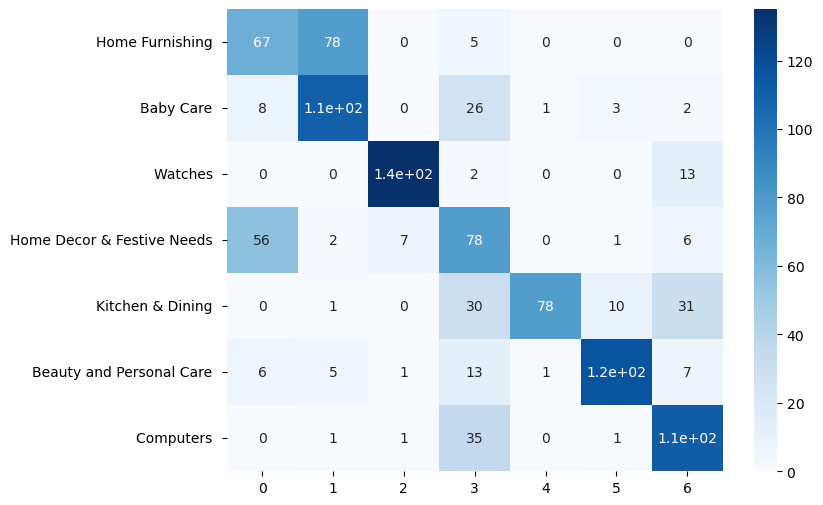

In [29]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels], columns = [i for i in "0123456"])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True, cmap="Blues")

# Etape 2 : classification supervisée
4 approches sont présentées :
* Une approche simple par préparation initiale de l'ensemble des images avant classification supervisée
* Une approche par data generator, permettant facilement la data augmentation. Les images sont directement récupérées à la volée dans le repertoire des images
* Une approche récente proposée par Tensorflow.org par DataSet, sans data augmentation
* Une approche par  DataSet, avec data augmentation intégrée au modèle : layer en début de modèle


1. **Une approche simple par préparation initiale de l'ensemble des images avant classification supervisée** : Les images sont prétraitées et formatées en un ensemble de données fixe avant d'entamer l'apprentissage supervisé, sans modifications ultérieures pendant l'entraînement.

2. **Une approche par data generator, permettant facilement la data augmentation. Les images sont directement récupérées à la volée dans le répertoire des images** : L'entraînement utilise un générateur qui charge et augmente dynamiquement les images directement depuis le répertoire pendant l'entraînement, permettant une diversité continue des données d'entrée.

3. **Une approche récente proposée par Tensorflow.org par DataSet, sans data augmentation** : Cette méthode utilise l'API `tf.data.Dataset` pour une gestion efficace et performante des données, sans appliquer de modifications ou d'augmentations aux images pendant l'entraînement.

4. **Une approche par DataSet, avec data augmentation intégrée au modèle : layer en début de modèle** : Similaire à l'approche précédente mais l'augmentation des données est intégrée directement dans le modèle sous forme de couches, appliquant des transformations à la volée aux images à chaque passage pendant l'entraînement.

## Création du modèle de classification

In [30]:
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model
    

## Approche préparation initiale des images

In [31]:
# def image_prep_fct(data) :
#     prepared_images = []
#     for image_num in range(len(data['image_path'])) :
#         img = (load_img(
#             path + data['image_path'][image_num],
#             target_size=(224, 224)))
#         img = img_to_array(img)
#         img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
#         img = preprocess_input(img)
#         prepared_images.append(img)
#         prepared_images_np = np.array(prepared_images)
#     return prepared_images_np

In [32]:
def image_prep_fct(data) :
    prepared_images = []
    for idx, row in data.iterrows():
        img = load_img(path + row['image_path'], target_size=(224, 224))
        img = img_to_array(img)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        prepared_images.append(img)
    prepared_images_np = np.array(prepared_images)
    return prepared_images_np


In [33]:
#train   
x_train_pre = image_prep_fct(train_df)
print(x_train_pre.shape)

y_train = to_categorical(train_df['label'])
print(y_train.shape)

(735, 224, 224, 3)
(735, 7)


In [34]:
#validation
x_val_pre = image_prep_fct(val_df)
print(x_val_pre.shape)

y_val = to_categorical(val_df['label'])
print(y_val.shape)

(157, 224, 224, 3)
(157, 7)


In [35]:
#test
x_test_pre = image_prep_fct(test_df)
print(x_val_pre.shape)


y_test = to_categorical(test_df['label'])
print(y_test.shape)

(157, 224, 224, 3)
(158, 7)


In [36]:
# Création du modèle
with tf.device('/cpu:0'): 
    model1 = create_model_fct()

# Création du callback
model1_save_path1 = "./model1_best_weights.h5"
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
callbacks_list = [checkpoint, es]


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [37]:
# Entraîner sur les données d'entraînement (X_train, y_train)
with tf.device('/cpu:0'): 
    history1 = model1.fit(x_train_pre, y_train, epochs=100, batch_size=64, 
                       callbacks=callbacks_list, validation_data=(x_val_pre, y_val), verbose=1)


Epoch 1/100
12/12 [==============================] - ETA: 0s - loss: 4.9779 - accuracy: 0.4694
Epoch 1: val_loss improved from inf to 1.59786, saving model to .\model1_best_weights.h5
12/12 [==============================] - 68s 6s/step - loss: 4.9779 - accuracy: 0.4694 - val_loss: 1.5979 - val_accuracy: 0.7197
Epoch 2/100
12/12 [==============================] - ETA: 0s - loss: 1.7720 - accuracy: 0.7265
Epoch 2: val_loss improved from 1.59786 to 1.31550, saving model to .\model1_best_weights.h5
12/12 [==============================] - 67s 6s/step - loss: 1.7720 - accuracy: 0.7265 - val_loss: 1.3155 - val_accuracy: 0.7516
Epoch 3/100
12/12 [==============================] - ETA: 0s - loss: 1.2514 - accuracy: 0.7578
Epoch 3: val_loss improved from 1.31550 to 1.15969, saving model to .\model1_best_weights.h5
12/12 [==============================] - 67s 6s/step - loss: 1.2514 - accuracy: 0.7578 - val_loss: 1.1597 - val_accuracy: 0.7707
Epoch 4/100
12/12 [==============================] - 

In [38]:
# Score du dernier epoch
loss, accuracy = model1.evaluate(x_train_pre, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model1.evaluate(x_val_pre, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

23/23 [==============================] - 54s 2s/step - loss: 0.0027 - accuracy: 1.0000
Training Accuracy: 1.0000

5/5 [==============================] - 12s 2s/step - loss: 1.0865 - accuracy: 0.8535
Validation Accuracy:  0.8535


In [39]:
# Score de l'epoch optimal
model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(x_val_pre, y_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model1.evaluate(x_test_pre, y_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.7898
Test Accuracy       :  0.7975


In [40]:
#! pip install plot_keras_history

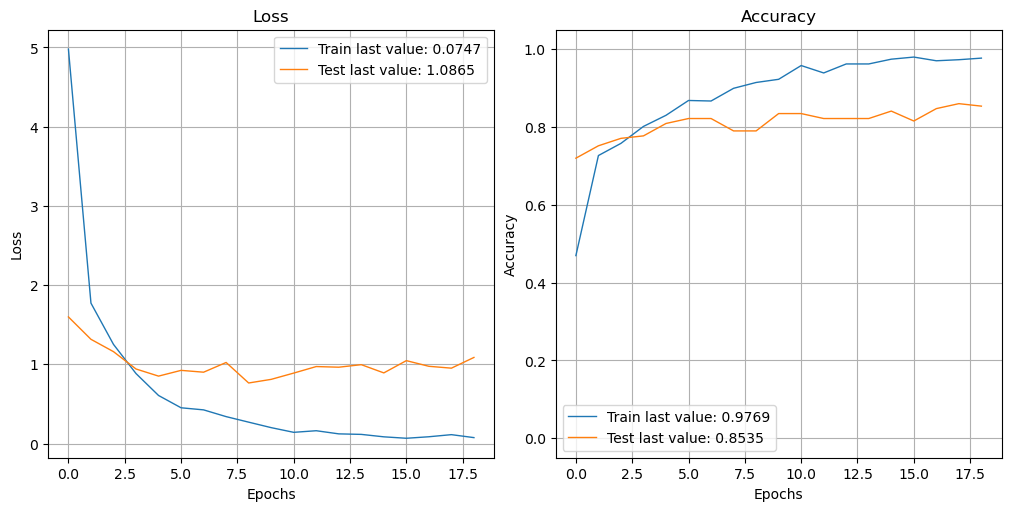

In [41]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history1)
plot_history(history1, path="standard.png")
plt.close()

In [42]:
y_val_num = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(model1.predict(x_val_pre), axis=1)
y_val_num = np.argmax(y_val, axis=1)
print(y_val_num)
print()
print(y_val_pred)

5/5 [==============================] - 12s 2s/step
[3 2 5 4 2 4 1 5 4 0 0 5 3 5 1 3 4 5 1 6 1 1 0 3 3 4 4 5 4 0 3 2 3 5 1 3 0
 0 6 5 4 6 4 6 6 6 0 3 3 4 4 4 2 1 2 6 5 6 3 3 6 6 6 4 0 3 2 4 5 5 3 3 6 2
 6 3 3 0 2 3 5 4 2 2 5 5 0 3 3 0 0 0 2 0 1 1 2 0 2 0 5 5 2 6 1 1 6 1 6 1 0
 1 5 6 3 0 4 1 2 0 3 2 1 5 6 6 4 5 2 2 1 0 5 2 5 6 4 6 4 1 1 5 4 0 5 1 0 2
 1 0 6 2 2 4 1 4 1]

[4 2 5 4 2 5 1 6 4 0 0 5 3 4 1 3 4 5 6 6 1 1 0 3 3 4 4 5 4 1 3 6 3 5 1 3 0
 1 6 5 4 6 5 6 6 6 0 5 3 4 4 4 2 3 2 6 5 6 3 1 0 6 0 4 1 6 2 4 5 5 3 3 6 2
 6 0 3 0 2 3 5 4 2 2 5 5 3 3 4 0 0 0 2 0 0 1 2 0 2 0 5 5 2 6 4 0 6 1 6 1 0
 1 5 6 3 0 4 1 2 1 3 2 1 5 6 6 4 5 2 2 6 0 5 2 5 5 3 6 6 1 6 3 4 3 4 1 0 2
 4 0 6 2 2 4 1 4 3]


In [43]:
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)
print(conf_mat)

[[17  4  0  2  0  0  0]
 [ 2 14  0  2  2  0  3]
 [ 0  0 21  0  0  0  1]
 [ 1  1  0 16  2  1  1]
 [ 0  0  0  1 18  2  1]
 [ 0  0  0  1  2 19  1]
 [ 2  0  0  0  0  1 19]]


In [44]:
y_val_pred_transform = conf_mat_transform(y_val_num, y_val_pred)
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_val_num, y_val_pred_transform))

Correspondance des clusters :  [0 1 2 3 4 5 6]
[[17  4  0  2  0  0  0]
 [ 2 14  0  2  2  0  3]
 [ 0  0 21  0  0  0  1]
 [ 1  1  0 16  2  1  1]
 [ 0  0  0  1 18  2  1]
 [ 0  0  0  1  2 19  1]
 [ 2  0  0  0  0  1 19]]

              precision    recall  f1-score   support

           0       0.77      0.74      0.76        23
           1       0.74      0.61      0.67        23
           2       1.00      0.95      0.98        22
           3       0.73      0.73      0.73        22
           4       0.75      0.82      0.78        22
           5       0.83      0.83      0.83        23
           6       0.73      0.86      0.79        22

    accuracy                           0.79       157
   macro avg       0.79      0.79      0.79       157
weighted avg       0.79      0.79      0.79       157



<Axes: >

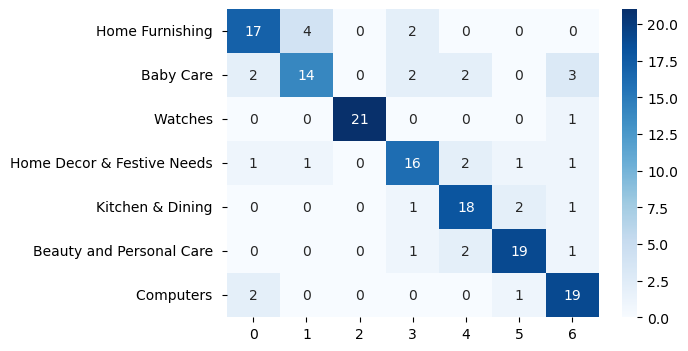

In [45]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

* Les images "shine" contenant de la neige sont désormais bien affectées à "shine" et non pas "cloud"

## Approche ImageDatagenerator avec data augmentation

CF https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow (noté désormais comme "deprecated", incite à utiiser l'approche suivante)

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
# Pour mélanger les images, classées initalement par classe
data = data.sample(frac=1, random_state=42).reset_index(drop=True)


In [48]:
batch_size = 32

def data_flow_fct(data, datagen, data_type=None) :
    data_flow = datagen.flow_from_dataframe(data, directory='Images',
                                x_col='image_path', y_col='label_name',
                                weight_col=None, target_size=(256, 256),
                                classes=None, class_mode='categorical',
                                batch_size=batch_size, shuffle=True, seed=42,
                                subset=data_type
                                )
    return data_flow

In [49]:
datagen_train = ImageDataGenerator(
#    featurewise_center=True,
#    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0,
    preprocessing_function=preprocess_input)

train_flow = data_flow_fct(train_df, datagen_train, data_type='training')
#val_flow = data_flow_fct(train_df, datagen_train, data_type='validation')

datagen_val = ImageDataGenerator(
    validation_split=0,
    preprocessing_function=preprocess_input)

val_flow = data_flow_fct(val_df, datagen_val, data_type=None)



datagen_test = ImageDataGenerator(
    validation_split=0,
    preprocessing_function=preprocess_input)

test_flow = data_flow_fct(test_df, datagen_test, data_type=None)

Found 735 validated image filenames belonging to 7 classes.
Found 157 validated image filenames belonging to 7 classes.
Found 158 validated image filenames belonging to 7 classes.


In [50]:
# Création du modèle
with tf.device('/cpu:0'): 
    model2 = create_model_fct()

# Création du callback
model2_save_path = "./model2_best_weights.h5"
checkpoint = ModelCheckpoint(model2_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
callbacks_list = [checkpoint, es]


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [51]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [52]:
with tf.device('/cpu:0'): 
    history2 = model2.fit(train_flow,
                    validation_data=val_flow,
                    batch_size=batch_size, epochs=100, callbacks=callbacks_list, verbose=1)


Epoch 1/100
23/23 [==============================] - ETA: 0s - loss: 3.7659 - accuracy: 0.4694
Epoch 1: val_loss improved from inf to 1.07917, saving model to .\model2_best_weights.h5
23/23 [==============================] - 93s 4s/step - loss: 3.7659 - accuracy: 0.4694 - val_loss: 1.0792 - val_accuracy: 0.8089
Epoch 2/100
23/23 [==============================] - ETA: 0s - loss: 1.5033 - accuracy: 0.6667
Epoch 2: val_loss improved from 1.07917 to 1.05310, saving model to .\model2_best_weights.h5
23/23 [==============================] - 92s 4s/step - loss: 1.5033 - accuracy: 0.6667 - val_loss: 1.0531 - val_accuracy: 0.8280
Epoch 3/100
23/23 [==============================] - ETA: 0s - loss: 1.0033 - accuracy: 0.7605
Epoch 3: val_loss improved from 1.05310 to 0.92684, saving model to .\model2_best_weights.h5
23/23 [==============================] - 92s 4s/step - loss: 1.0033 - accuracy: 0.7605 - val_loss: 0.9268 - val_accuracy: 0.8217
Epoch 4/100
23/23 [==============================] - 

In [53]:
# Score du dernier epoch
loss, accuracy = model2.evaluate(train_flow, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model2.evaluate(val_flow, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

23/23 [==============================] - 75s 3s/step - loss: 0.0719 - accuracy: 0.9741
Training Accuracy   : 0.9741

5/5 [==============================] - 16s 3s/step - loss: 1.1521 - accuracy: 0.8471
Validation Accuracy :  0.8471


In [54]:
# Score de l'epoch optimal
model2.load_weights(model2_save_path)

loss, accuracy = model2.evaluate(val_flow, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model2.evaluate(test_flow, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.8471
Test Accuracy       :  0.7722


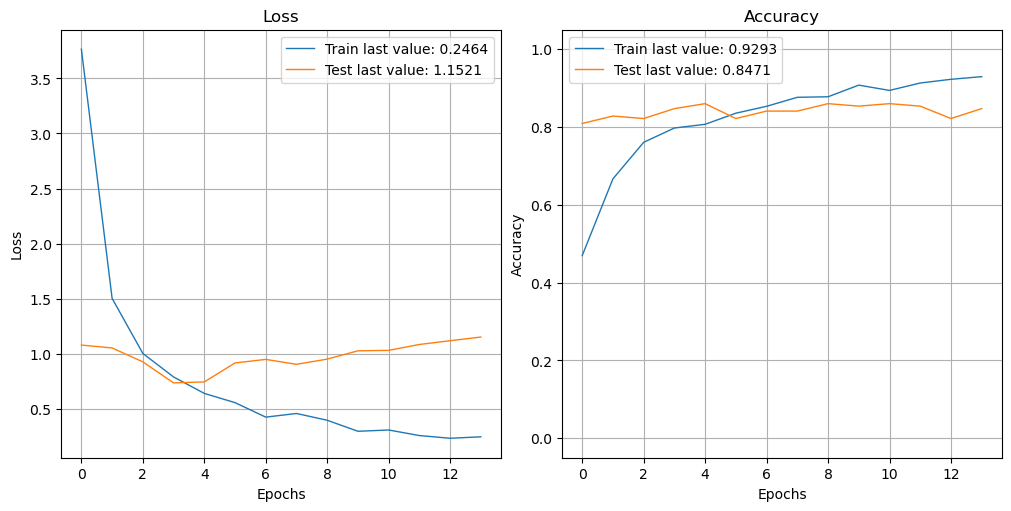

In [55]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history2)
plot_history(history2, path="standard.png")
plt.close()

## Approche nouvelle par Dataset sans data augmentation

CF https://www.tensorflow.org/tutorials/load_data/images

In [56]:
path2 = "C:/Users/pouri/OneDrive/Bureau/P6/7categ1/train"
path3 = "C:/Users/pouri/OneDrive/Bureau/P6/7categ1/test"


path2

'C:/Users/pouri/OneDrive/Bureau/P6/7categ1/train'

In [57]:
batch_size = 32

def dataset_fct(path, validation_split=0, data_type=None) :
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, labels='inferred', label_mode='categorical',
                    class_names=None, batch_size=batch_size, image_size=(224, 224), shuffle=True, seed=42,
                    validation_split=validation_split, subset=data_type
                    )
    return dataset

In [58]:
dataset_train = dataset_fct(path2, validation_split=0.25, data_type='training')
dataset_val = dataset_fct(path2, validation_split=0.25, data_type='validation')
dataset_test = dataset_fct(path3, validation_split=0, data_type=None)

Found 892 files belonging to 7 classes.
Using 669 files for training.
Found 892 files belonging to 7 classes.
Using 223 files for validation.
Found 158 files belonging to 7 classes.


In [59]:
# Création du modèle
with tf.device('/cpu:0'): 
    model3 = create_model_fct()

# Création du callback
model3_save_path = "./model3_best_weights.h5"
checkpoint = ModelCheckpoint(model3_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
callbacks_list = [checkpoint, es]


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [60]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [61]:
with tf.device('/cpu:0'): 
    history3 = model3.fit(dataset_train,
                    validation_data=dataset_val,
                    batch_size=batch_size, epochs=100, callbacks=callbacks_list, verbose=1)


Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 5.4630 - accuracy: 0.4858
Epoch 1: val_loss improved from inf to 2.55898, saving model to .\model3_best_weights.h5
21/21 [==============================] - 70s 3s/step - loss: 5.4630 - accuracy: 0.4858 - val_loss: 2.5590 - val_accuracy: 0.6906
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.7100
Epoch 2: val_loss improved from 2.55898 to 2.13358, saving model to .\model3_best_weights.h5
21/21 [==============================] - 69s 3s/step - loss: 2.3027 - accuracy: 0.7100 - val_loss: 2.1336 - val_accuracy: 0.7354
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 1.3081 - accuracy: 0.7534
Epoch 3: val_loss improved from 2.13358 to 1.96820, saving model to .\model3_best_weights.h5
21/21 [==============================] - 69s 3s/step - loss: 1.3081 - accuracy: 0.7534 - val_loss: 1.9682 - val_accuracy: 0.7085
Epoch 4/100
21/21 [==============================] - 

In [62]:
# Score du dernier epoch
loss, accuracy = model3.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model3.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

21/21 [==============================] - 51s 2s/step - loss: 0.0134 - accuracy: 0.9955
Training Accuracy   : 0.9955

7/7 [==============================] - 17s 2s/step - loss: 1.9224 - accuracy: 0.7982
Validation Accuracy :  0.7982


In [63]:
# Score de l'epoch optimal
model3.load_weights(model3_save_path)

loss, accuracy = model3.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model3.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.7758
Test Accuracy       :  0.7532


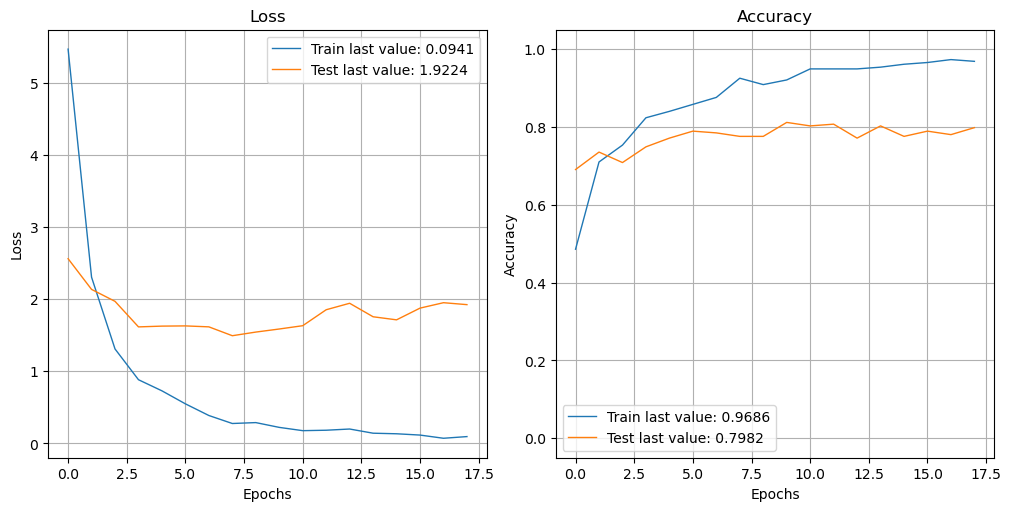

In [64]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history3)
plot_history(history3, path="standard.png")
plt.close()

## Approche nouvelle par Dataset avec data augmentation intégrée au modèle

CF https://www.tensorflow.org/tutorials/images/data_augmentation

In [65]:
batch_size = 32

def dataset_fct(path, validation_split=0, data_type=None) :
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, labels='inferred', label_mode='categorical',
                    class_names=None, batch_size=batch_size, image_size=(224, 224), shuffle=True, seed=42,
                    validation_split=validation_split, subset=data_type
                    )
    return dataset

In [66]:
dataset_train = dataset_fct(path2, validation_split=0.25, data_type='training')
dataset_val = dataset_fct(path2, validation_split=0.25, data_type='validation')
dataset_test = dataset_fct(path3, validation_split=0, data_type=None)

Found 892 files belonging to 7 classes.
Using 669 files for training.
Found 892 files belonging to 7 classes.
Using 223 files for validation.
Found 158 files belonging to 7 classes.


In [67]:
def resize_and_rescale(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = (image / 255.0)
    return image, label



In [68]:
def create_model_fct2() :
    # Data augmentation
    data_augmentation = Sequential([
        RandomFlip("horizontal", input_shape=(224, 224, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1),
        # Rescaling(1./127.5, offset=-1.0)
      ])
    
    # Récupération modèle pré-entraîné
    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        layer.trainable = False

    # Définition du nouveau modèle
    model = Sequential([
                data_augmentation,
                Rescaling(1./127.5, offset=-1),
                model_base,
                GlobalAveragePooling2D(),
                Dense(256, activation='relu'),
                Dropout(0.5),
                Dense(7, activation='softmax')
                ])

    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

    print(model.summary())
    
    return model
    

In [69]:
# Création du modèle
with tf.device('/cpu:0'): 
    model4 = create_model_fct2()

# Création du callback
model4_save_path = "./model4_best_weights.h5"
checkpoint = ModelCheckpoint(model4_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
callbacks_list = [checkpoint, es]


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                      

In [70]:
with tf.device('/cpu:0'): 
    history4 = model4.fit(dataset_train,
                    validation_data=dataset_val,
                    batch_size=batch_size, epochs=100, callbacks=callbacks_list, verbose=1)


Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 1.8589 - accuracy: 0.2780
Epoch 1: val_loss improved from inf to 1.43249, saving model to .\model4_best_weights.h5
21/21 [==============================] - 73s 3s/step - loss: 1.8589 - accuracy: 0.2780 - val_loss: 1.4325 - val_accuracy: 0.6771
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 1.4097 - accuracy: 0.5381
Epoch 2: val_loss improved from 1.43249 to 1.13004, saving model to .\model4_best_weights.h5
21/21 [==============================] - 70s 3s/step - loss: 1.4097 - accuracy: 0.5381 - val_loss: 1.1300 - val_accuracy: 0.7354
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 1.1199 - accuracy: 0.6756
Epoch 3: val_loss improved from 1.13004 to 1.00174, saving model to .\model4_best_weights.h5
21/21 [==============================] - 71s 3s/step - loss: 1.1199 - accuracy: 0.6756 - val_loss: 1.0017 - val_accuracy: 0.7444
Epoch 4/100
21/21 [==============================] - 

Epoch 20/100
21/21 [==============================] - ETA: 0s - loss: 0.5374 - accuracy: 0.8146
Epoch 20: val_loss improved from 0.75046 to 0.74175, saving model to .\model4_best_weights.h5
21/21 [==============================] - 73s 3s/step - loss: 0.5374 - accuracy: 0.8146 - val_loss: 0.7417 - val_accuracy: 0.7848
Epoch 21/100
21/21 [==============================] - ETA: 0s - loss: 0.4789 - accuracy: 0.8625
Epoch 21: val_loss did not improve from 0.74175
21/21 [==============================] - 72s 3s/step - loss: 0.4789 - accuracy: 0.8625 - val_loss: 0.7469 - val_accuracy: 0.7803
Epoch 22/100
21/21 [==============================] - ETA: 0s - loss: 0.4721 - accuracy: 0.8341
Epoch 22: val_loss did not improve from 0.74175
21/21 [==============================] - 72s 3s/step - loss: 0.4721 - accuracy: 0.8341 - val_loss: 0.7443 - val_accuracy: 0.7803
Epoch 23/100
21/21 [==============================] - ETA: 0s - loss: 0.4832 - accuracy: 0.8475
Epoch 23: val_loss did not improve from

In [71]:
# Score du dernier epoch
loss, accuracy = model4.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model4.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

21/21 [==============================] - 52s 2s/step - loss: 0.2790 - accuracy: 0.9148
Training Accuracy   : 0.9148

7/7 [==============================] - 17s 2s/step - loss: 0.8011 - accuracy: 0.7892
Validation Accuracy :  0.7892


In [72]:
# Score de l'epoch optimal

model4.load_weights(model4_save_path)

loss, accuracy = model4.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model4.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.7848
Test Accuracy       :  0.7468


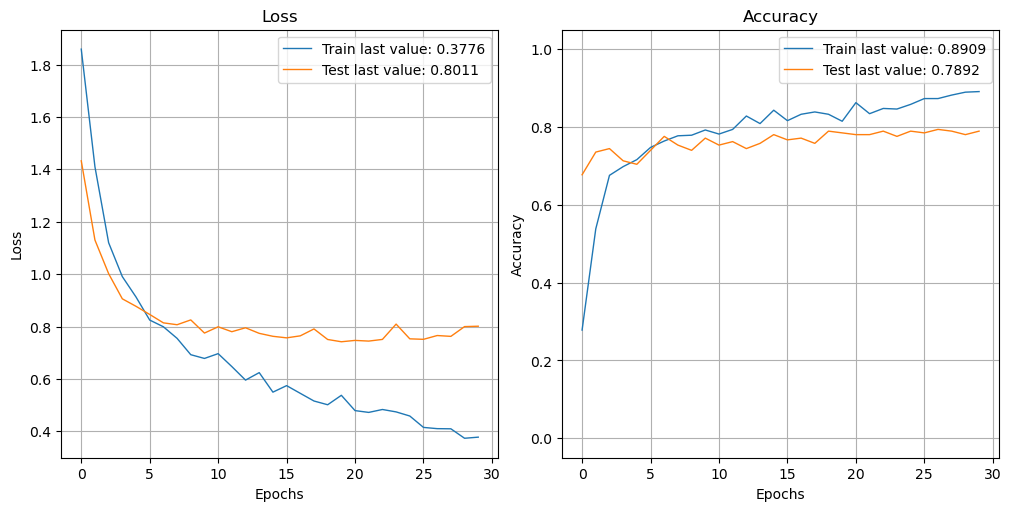

In [73]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history4)
plot_history(history4, path="standard.png")
plt.close()